In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon (2).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import math

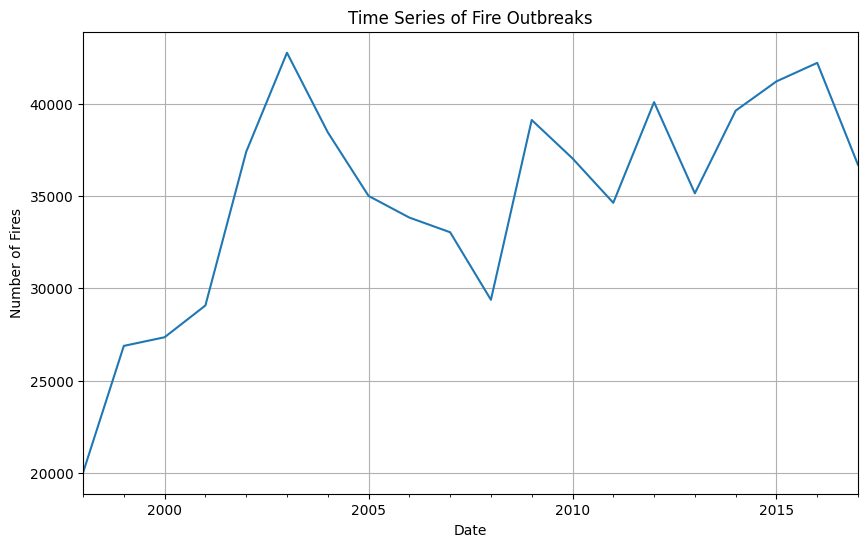

In [ ]:
# Load dataset
df = pd.read_csv('/content/amazon.csv', encoding='latin1')  # Use your dataset path

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Aggregate data by date
time_series = df.groupby('date')['number'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.title("Time Series of Fire Outbreaks")
plt.xlabel("Date")
plt.ylabel("Number of Fires")
plt.grid()
plt.show()


Augmented Dickey-Fuller Test (ADF Test) to check if the series is stationary:

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

adf_test(time_series)


ADF Statistic: -3.2096677542305945
p-value: 0.019431847574098392
The data is stationary.


Apply differencing to remove trends:

ADF Statistic: -4.710793459893883
p-value: 8.031051380855142e-05
The data is stationary.


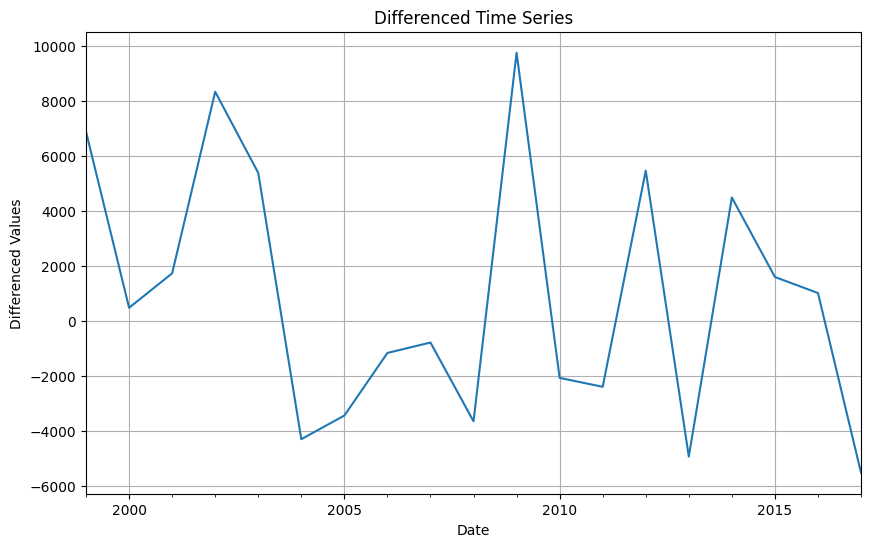

In [ ]:
# Apply differencing
time_series_diff = time_series.diff().dropna()

# Re-run the ADF test
adf_test(time_series_diff)

# Plot the differenced series
plt.figure(figsize=(10, 6))
time_series_diff.plot()
plt.title("Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Differenced Values")
plt.grid()
plt.show()


Here we can see the data available to analysis. Let's drop the 'date' column, as we can have that information about year and month in their own columns.

In [ ]:
df.drop('date', axis=1, inplace=True)
df.tail()

,year,state,month,number
6449,2012,Tocantins,Dezembro,128.0
6450,2013,Tocantins,Dezembro,85.0
6451,2014,Tocantins,Dezembro,223.0
6452,2015,Tocantins,Dezembro,373.0
6453,2016,Tocantins,Dezembro,119.0


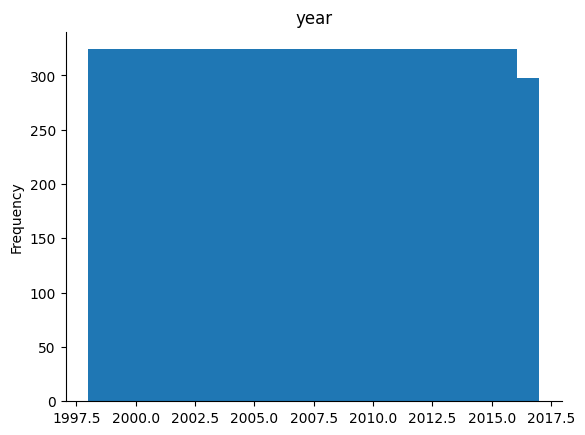

In [ ]:
from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

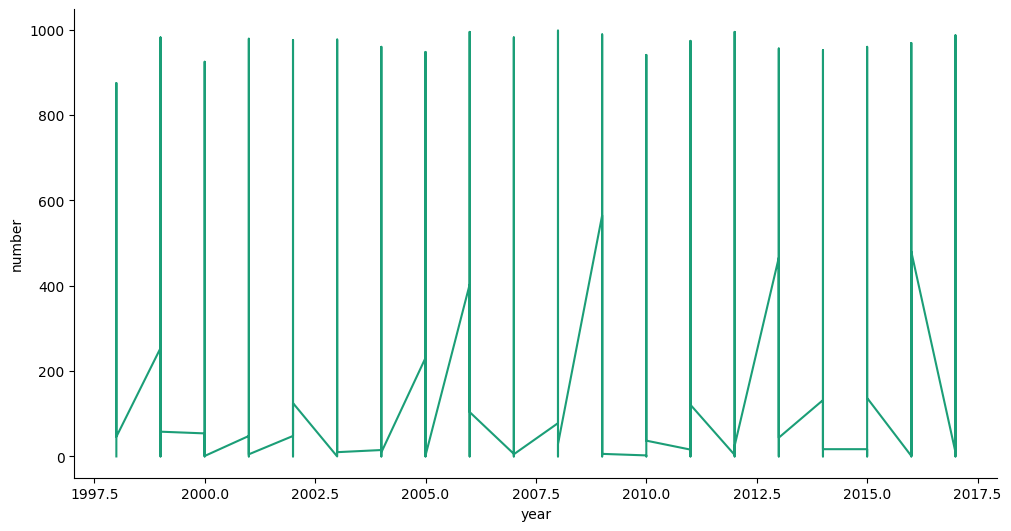

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['number']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('number')

We should change the month names to english.

In [ ]:
df.month.replace('Janeiro', 'January',inplace=True)
df.month.replace('Fevereiro','February',inplace=True)
df.month.replace('Março','March',inplace=True)
df.month.replace('Abril','April',inplace=True)
df.month.replace('Maio','May',inplace=True)
df.month.replace('Junho','June',inplace=True)
df.month.replace('Julho','July',inplace=True)
df.month.replace('Agosto','August',inplace=True)
df.month.replace('Setembro','September',inplace=True)
df.month.replace('Outubro','October',inplace=True)
df.month.replace('Novembro','November',inplace=True)
df.month.replace('Dezembro','December',inplace=True)
df.tail()

<ipython-input-13-2d8668056311>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.month.replace('Janeiro', 'January',inplace=True)
<ipython-input-13-2d8668056311>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,year,state,month,number
6449,2012,Tocantins,December,128.0
6450,2013,Tocantins,December,85.0
6451,2014,Tocantins,December,223.0
6452,2015,Tocantins,December,373.0
6453,2016,Tocantins,December,119.0


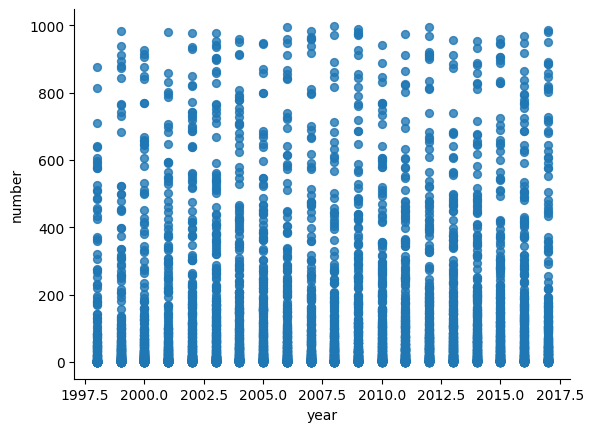

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='year', y='number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Below, we can see the statiscal information about the reported number of fires

In [ ]:
df['number'].describe()

,number
count,6454.000000
mean,108.293163
std,190.812242
min,0.000000
25%,3.000000
50%,24.000000
75%,113.000000
max,998.000000


Although the mean number of reported fires is relatively low, the standard deviation is quite high. Suggesting that it changes over time.


As we can see, the max number of fires is 998. Let's discover where and when it happened.

In [ ]:
print('Max number of registered fires in a month: ',df['number'].max())
print('State: ',df[df['number'] ==  df['number'].max()]['state'].iloc[0])
print('Year: ',df[df['number'] ==  df['number'].max()]['month'].iloc[0])
print('Month: ',df[df['number'] ==  df['number'].max()]['year'].iloc[0])

Max number of registered fires in a month:  998.0
State:  Amazonas
Year:  September
Month:  2008


It happened in the state of Amazonas. As we know, the state of Amazonas contains a large area of the amazon rainforest, therefore, is not surprise that the max number of fires has been reported in that state.

Worst months: 
August
July
November
October


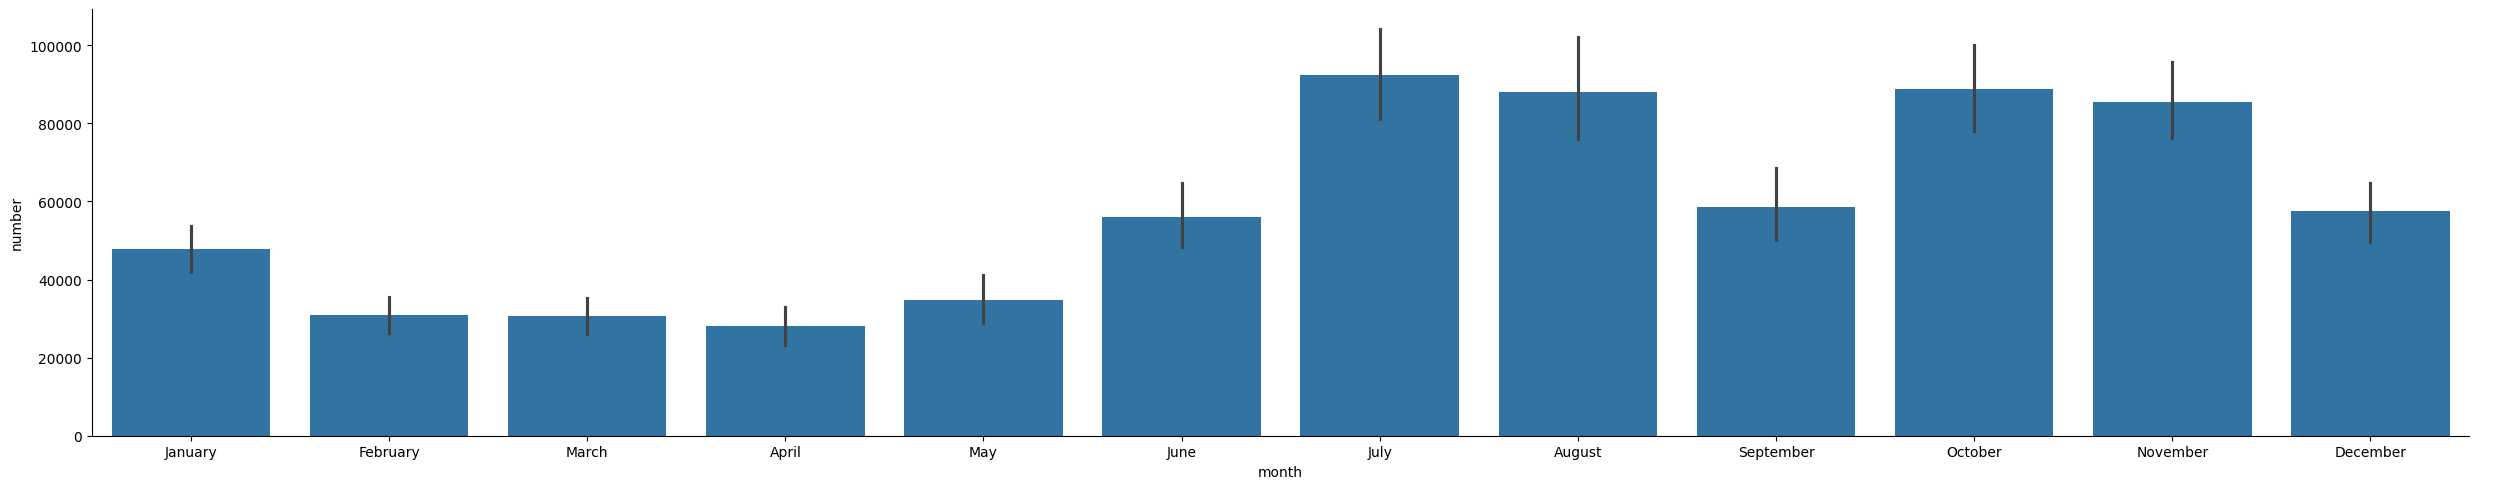

In [ ]:
queim_sum_mês = df.groupby(['month'], as_index=False).sum()
queim_sum_mês.drop('year',axis=1, inplace=True)

piores_meses = queim_sum_mês[queim_sum_mês['number']>queim_sum_mês['number'].mean()+queim_sum_mês['number'].std()]
print('Worst months: ')
for i in range(len(piores_meses)):
    print(piores_meses['month'].values[i])

sns.catplot(x='month', y='number', kind='bar',data=df[['month','number']], aspect=5, estimator=sum);

Our statistical approach seems to work fine, since it is in accordance to the higher values of reported fire, therefore, filtering the lesser critical months.

Using the same approach, we define the states that are more affected by fire.

Worst states: 
Mato Grosso
Paraiba
Sao Paulo


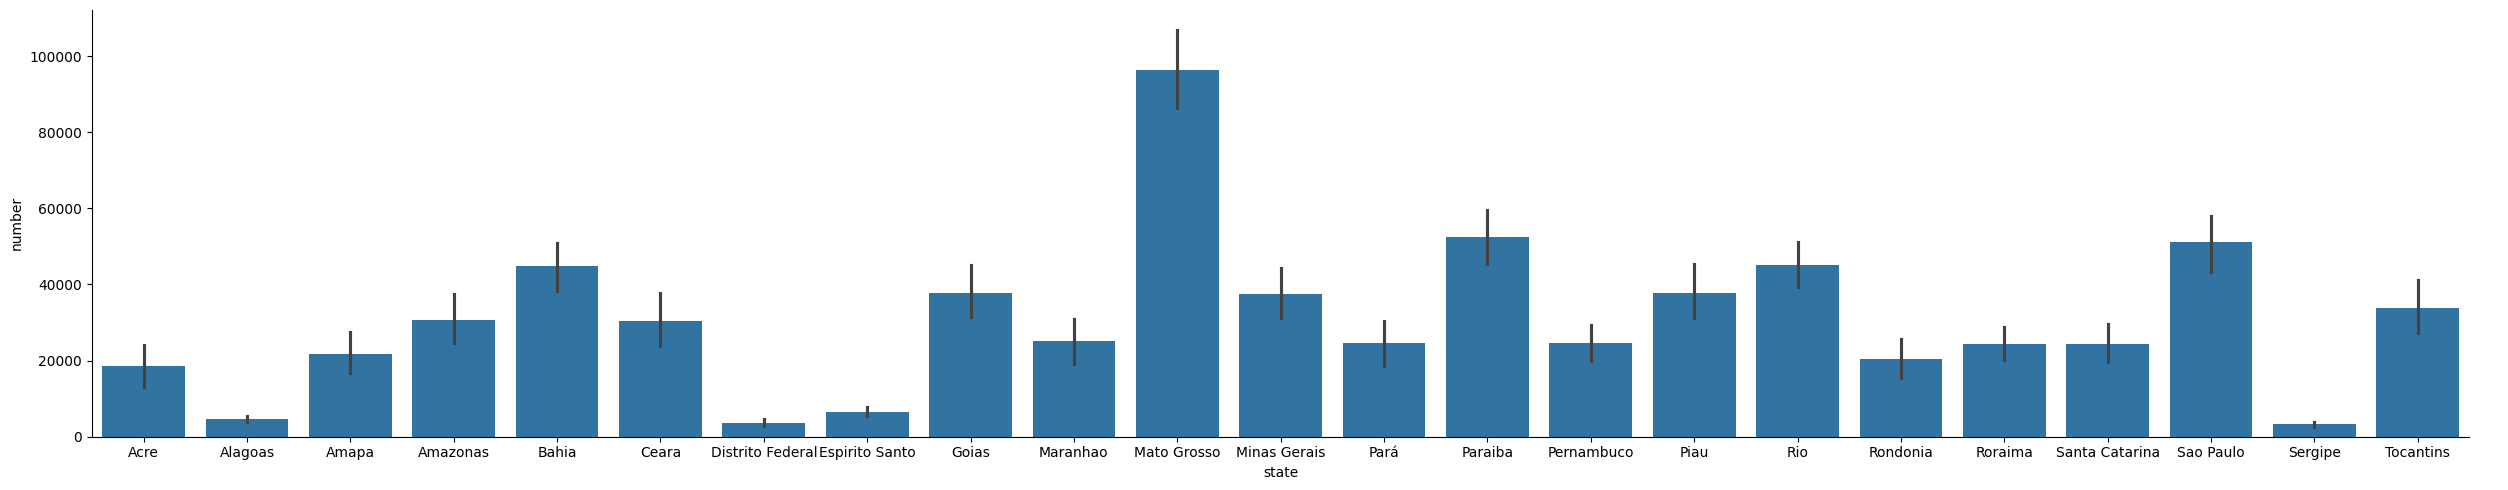

In [ ]:
queim_sum_estados = df.groupby(['state'], as_index=False).sum()
queim_sum_estados.drop('year',axis=1, inplace=True)


sns.catplot(x='state', y='number',data=df[['state','number']], kind='bar', aspect=5, estimator=sum);

piores_estados = queim_sum_estados[queim_sum_estados['number']> queim_sum_estados['number'].mean() +queim_sum_estados['number'].std()]
print('Worst states: ')
for i in range(len(piores_estados)):
    print(piores_estados['state'].values[i])

Curiously, the state of Amazonia is not included in the list. Maybe the first information about Amazonia that we found is a "outlier" of the occurances in the state, and is not a good representation of what actually happens there.

At last, we see how the reported number of fires has changed over the years. We use the same statistical approach to define the worst ones.

Worst years: 
2003
2015
2016


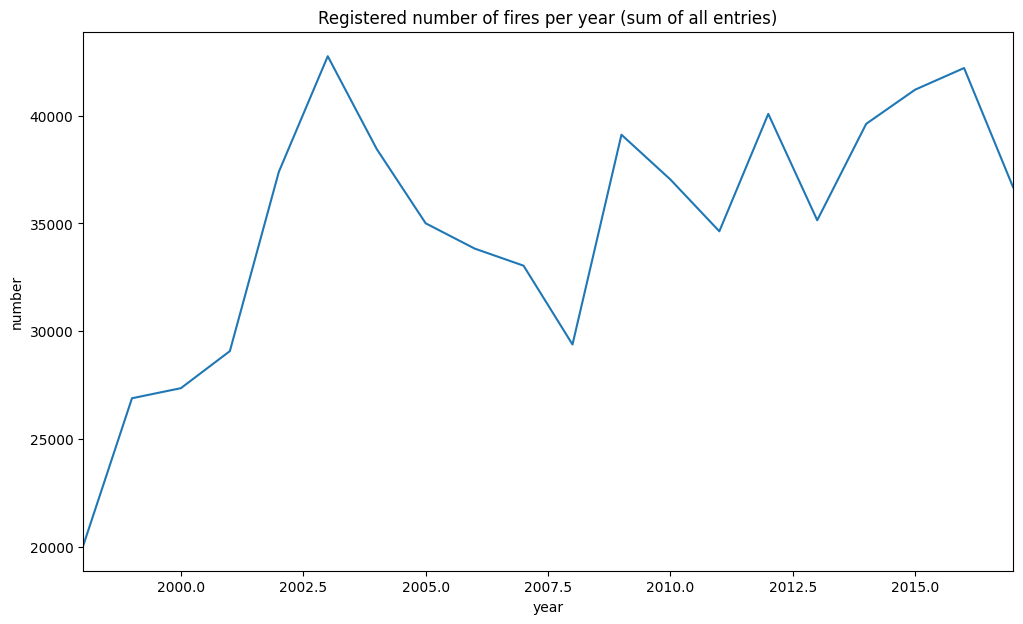

In [ ]:
queim_sum_ano = df.groupby(['year'], as_index=False).sum()

piores_anos = queim_sum_ano[queim_sum_ano['number']>queim_sum_ano['number'].mean() + queim_sum_ano['number'].std()]
print('Worst years: ')
for i in range(len(piores_anos)):
    print(piores_anos['year'].values[i])


plt.figure(figsize=[12,7])
plt.xlim([1998, 2017])
plt.title('Registered number of fires per year (sum of all entries)')
sns.lineplot(x='year', y='number',data=queim_sum_ano);

We can see a that the reported number of fires increased in a very fast rhythm until 2003, then it started to fall. But since 2008, this number started to increase again.

Let's see if can predict the number of fires in the incoming years using the data available.

Analysing the data, seems reasonable to fit it into a third degree polynomial function.

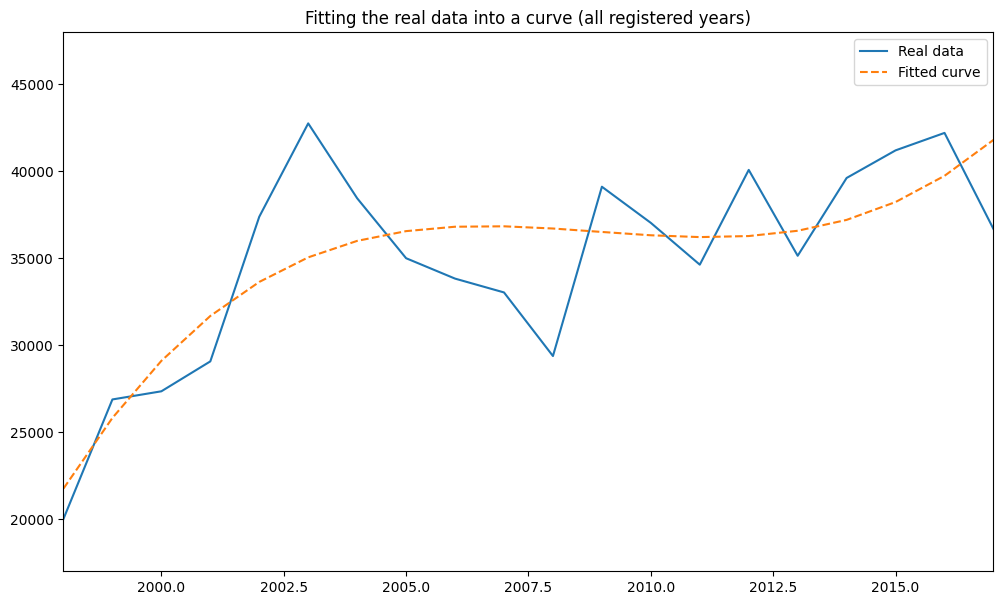

In [ ]:
poly = np.polyfit(queim_sum_ano['year'],queim_sum_ano['number'],3)
z = np.poly1d(poly)

anos = np.linspace(1998, 2017, 20)

plt.figure(figsize=[12,7])
plt.plot(anos, queim_sum_ano['number'], '-', label='Real data')
plt.plot(anos,z(anos), '--', label='Fitted curve')
plt.xlim([1998, 2017])
plt.ylim([17000, 48000])
plt.title('Fitting the real data into a curve (all registered years)')
plt.legend()
plt.show()

Predicting the number of fires:

In [ ]:

for i in range(2019,2024,1):
    print(i, '->', math.trunc(z(i)))

2019 -> 47933
2020 -> 52148
2021 -> 57237
2022 -> 63279
2023 -> 70352


It is not very optimistic, is it? The third degree polynomial seems to be a bit aggresive, maybe, due to the earlier years of the data set and it fast increase. Let's use only the data after 2006, and fit it into a first degree polynomial function.

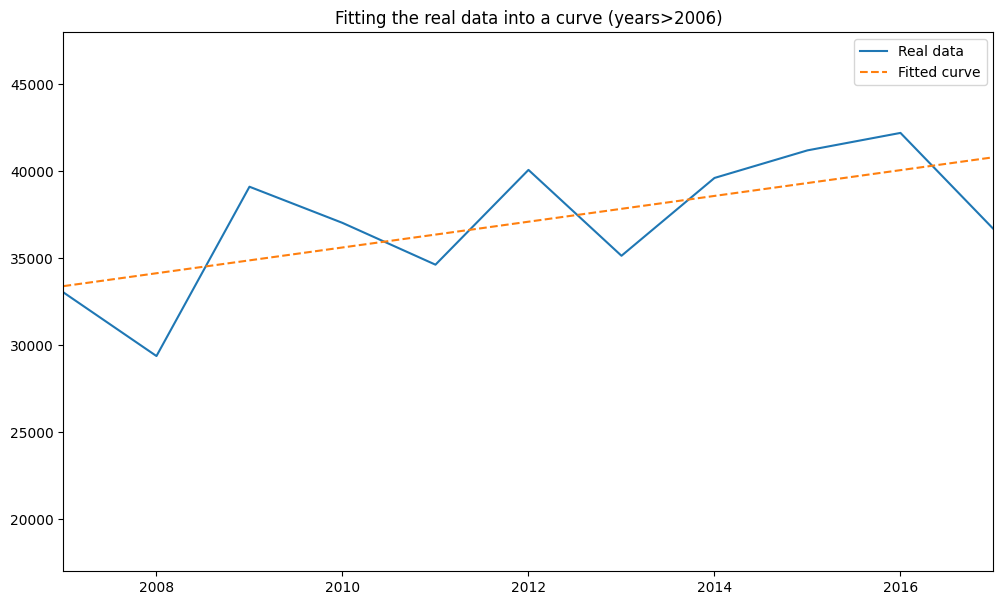

In [ ]:
new_model = queim_sum_ano[queim_sum_ano['year']>2006]
poly = np.polyfit(new_model['year'],new_model['number'],1)
z = np.poly1d(poly)

anos = np.linspace(2007, 2017, 11)

plt.figure(figsize=[12,7])
plt.plot(anos, new_model['number'], '-', label='Real data')
plt.plot(anos,z(anos), '--', label='Fitted curve')
plt.xlim([2007, 2017])
plt.ylim([17000, 48000])
plt.title('Fitting the real data into a curve (years>2006)')
plt.legend()
plt.show()

Use the ARIMA model to fit the time series:

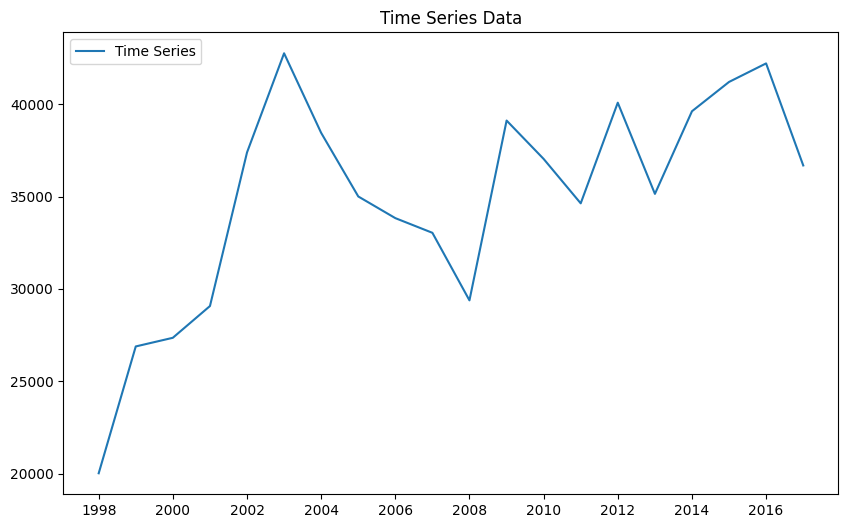

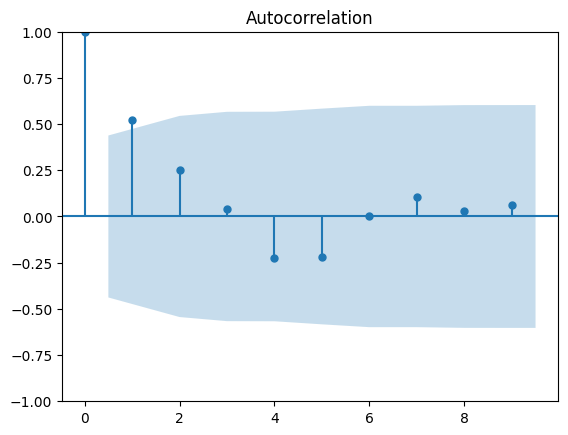

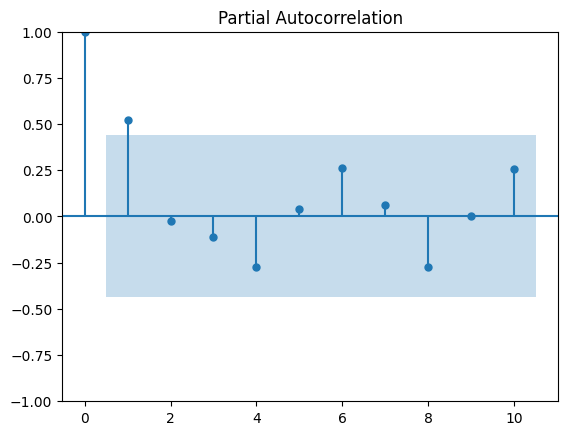

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 number   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -186.471
Date:                Mon, 20 Jan 2025   AIC                            378.943
Time:                        05:00:13   BIC                            381.776
Sample:                    01-01-1998   HQIC                           379.422
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7393      0.235     -3.152      0.002      -1.199      -0.280
ma.L1          0.9999      0.354      2.821      0.005       0.305       1.695
sigma2      1.833e+07   1.93e-08   9.48e+14      0.0

In [ ]:
# Step 1: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Time Series")
plt.title("Time Series Data")
plt.legend()
plt.show()

# Calculate maximum lag based on 50% of the sample size
max_lag = len(time_series) // 2

# Use the calculated maximum lag for both ACF and PACF plots
plot_acf(time_series, lags=max_lag -1)  # Adjust lags for ACF
plt.show()

plot_pacf(time_series, lags=max_lag)  # Adjust lags for PACF
plt.show()

# Step 3: Fit ARIMA model (replace p, d, q with values from analysis)
try:
    model = ARIMA(time_series, order=(1, 1, 1))  # Example: ARIMA(1, 1, 1)
    fitted_model = model.fit()

    # Step 4: Print model summary
    print(fitted_model.summary())
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assume time_series is already defined
# Fit an initial model to estimate ma.L1
initial_model = ARIMA(time_series, order=(1, 1, 1))  # Example initial model
initial_fitted_model = initial_model.fit()
ma_L1_value = initial_fitted_model.params.get('ma.L1', 0)  # Get the non-seasonal MA parameter

best_model = None
min_diff = float('inf')

for p in range(3):  # Example range for p
    for q in range(3):  # Example range for q
        try:
            # Fit the ARIMA model
            model = ARIMA(time_series, order=(p, 1, q))  # Change 0 to 1 if differencing is needed
            fitted_model = model.fit()

            # Get AR and sigma2 parameters
            ar_L1_value = fitted_model.params.get('ar.L1', 0)
            sigma2_value = fitted_model.params.get('sigma2', 0)

            # Compute the difference
            diff = abs(ar_L1_value - ma_L1_value) + abs(sigma2_value - ma_L1_value)

            # Update the best model
            if diff < min_diff:
                min_diff = diff
                best_model = fitted_model

        except Exception as e:
            print(f"Error fitting model with order=({p}, 1, {q}): {e}")

# Print the summary of the best model
if best_model:
    print(best_model.summary())
else:
    print("No suitable model was found.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

                               SARIMAX Results                                
Dep. Variable:                 number   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -186.304
Date:                Mon, 20 Jan 2025   AIC                            382.608
Time:                        05:00:14   BIC                            387.330
Sample:                    01-01-1998   HQIC                           383.407
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0697      0.746      0.093      0.926      -1.393       1.532
ar.L2          0.6430      0.568      1.133      0.257      -0.469       1.755
ma.L1          0.2190      1.222      0.179      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings during fitting (optional)
warnings.filterwarnings("ignore")

# Variables to track the best model
best_model = None
min_aic = float('inf')  # Use AIC for model selection

# Experiment with model orders
for p in range(3):  # Example range for p
    for q in range(3):  # Example range for q
        try:
            # Fit ARIMA model
            model = ARIMA(time_series_diff, order=(p, 0, q))
            fitted_model = model.fit()

            # Check and store the model with the lowest AIC
            if fitted_model.aic < min_aic:
                min_aic = fitted_model.aic
                best_model = fitted_model

        except Exception as e:
            # Log details about fitting errors
            print(f"Error fitting ARIMA({p}, 0, {q}) model: {e}")

# Display the best model's summary
if best_model:
    print(f"Best ARIMA Model: Order({best_model.model.order}) with AIC = {min_aic}")
    print(best_model.summary())
else:
    print("No suitable ARIMA model found.")


Best ARIMA Model: Order((0, 0, 0)) with AIC = 377.961822934803
                               SARIMAX Results                                
Dep. Variable:                 number   No. Observations:                   19
Model:                          ARIMA   Log Likelihood                -186.981
Date:                Mon, 20 Jan 2025   AIC                            377.962
Time:                        05:00:15   BIC                            379.851
Sample:                    01-01-1999   HQIC                           378.281
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        877.4908   1152.653      0.761      0.446   -1381.668    3136.650
sigma2      2.092e+07   1.07e+07      1.952      0.051    -8.2e+04  

Forecasted Values:
2018-01-01    1773.187223
2019-01-01    3039.978244
2020-01-01     490.285393
2021-01-01    1779.385979
2022-01-01     306.828915
Freq: YS-JAN, Name: predicted_mean, dtype: float64


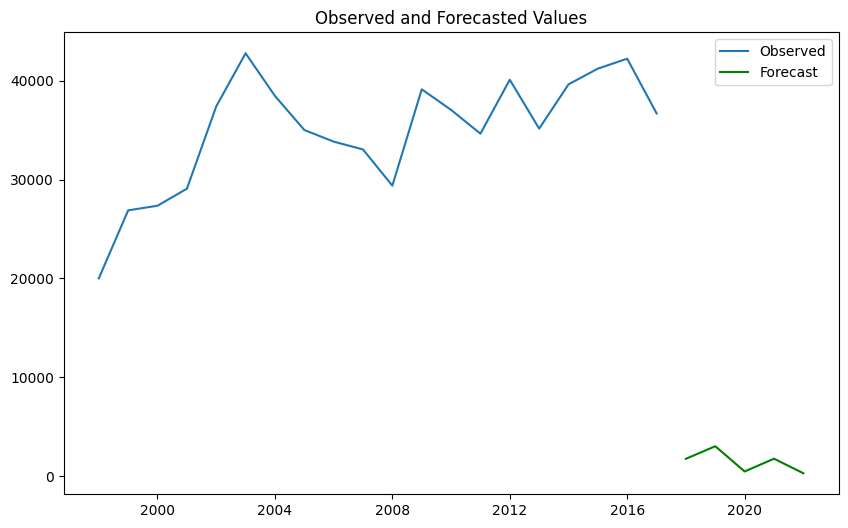

In [ ]:
# Forecast future values
forecast_steps = 5  # Number of future steps to predict
forecast = fitted_model.forecast(steps=forecast_steps)
print("Forecasted Values:")
print(forecast)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Observed")
plt.plot(forecast, label="Forecast", color='green')
plt.legend()
plt.title("Observed and Forecasted Values")
plt.show()


In [ ]:
forecast.to_csv('arima_forecast.csv', index=False)